<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/COLA_CON_DOS_SERVIDORES_EN_SERIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COLA CON DOS SERVIDORES EN SERIE

Este modelo sigue el siguiente esquema

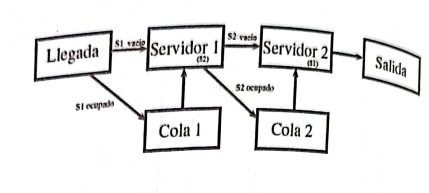

Las variables se consideran las siguientes:
* Variable de tiempo
* NLL: Npumero de llegadas hasta el instante t
* NS = número de salidas hasta el instante t
* n1 : número de clientes en la cola y atendido, en S1 para el instante t
n2: número d eclientes en S2 en el instante t


In [ ]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def t_llegada():
    return random.expovariate(1.0)  # Tasa de llegada

In [ ]:
#Generación del tiempo de servicio
def tserv():
  t = (-1/2)*np.log(np.random.uniform(0,1))
  return t

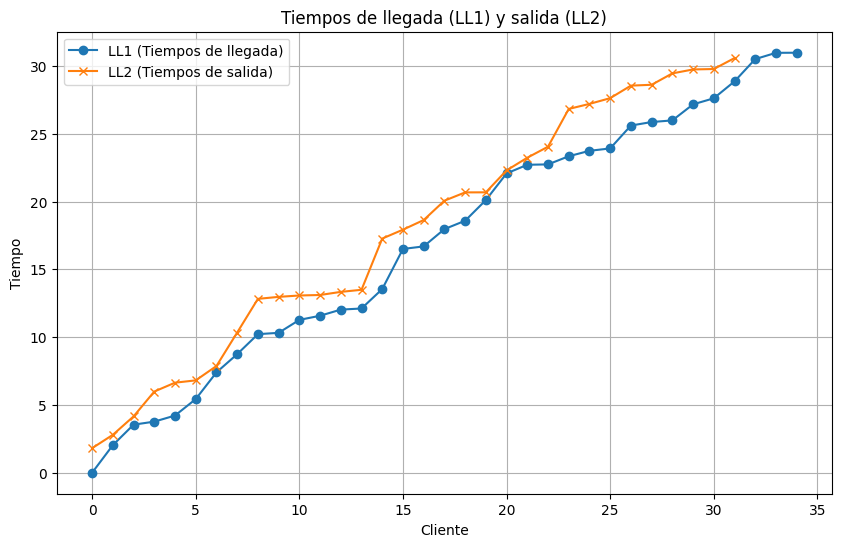

In [ ]:

t = 0
n1 = 0
n2 = 0
NLL = 0
tLL = 0
t1 = math.inf
t2 = math.inf
LL1 = []
LL2 = []
S = []
NS = 0
N = 100

for i in range(N):
  if (tLL < t1) and (tLL <= t2):
    t = tLL
    NLL += 1
    n1 += 1
    LL1.append(t) # Almacena el tiempo de llegada
    tLL = t + t_llegada() # Actualiza el tiempo de la próxima llegada
    if n1 == 1:
      Y = tserv()
      t1 = t + Y

  elif (tLL > t1) and (t1 <= t2):
    t = t1
    n1 -= 1
    n2 += 1
    #LL1.append(t) # No se agrega a LL1 en este caso
    if n1 == 0:
      t1 = math.inf
    else:
      Y = tserv()
      t1 = t + Y
    if n2 == 1:
      Y = tserv()
      t2 = t + Y

  elif (t2 < t1) and (t2 < tLL):
    t = t2
    NS += 1
    n2 -= 1
    LL2.append(t) #Almacena el tiempo de salida

    if n2 > 0:
      Y = tserv()
      t2 = t + Y
    else:
      t2 = math.inf

# Gráfica de LL1 y LL2
plt.figure(figsize=(10, 6))
plt.plot(LL1, label='LL1 (Tiempos de llegada)', marker='o', linestyle='-')
plt.plot(LL2, label='LL2 (Tiempos de salida)', marker='x', linestyle='-')
plt.xlabel('Cliente')
plt.ylabel('Tiempo')
plt.title('Tiempos de llegada (LL1) y salida (LL2)')
plt.legend()
plt.grid(True)
plt.show()

Para este caso, no establecemos un tiempo de cierre, ya que se podría complicar más el poroblema.